In [3]:
#ironデータの入手
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')
nov_path="/content/drive/My Drive/iron_price_ai/dataset_iron_price.xlsx"

iron_df=pd.read_excel(nov_path, skiprows=0, header=1, index_col=0)
iron_data=iron_df.values

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
#一旦全変数を使った多回帰分析をする.
#データ分け
from sklearn.model_selection import train_test_split
x_train,x_test,t_train,t_test=train_test_split(iron_data[:,1:7],iron_data[:,0],random_state=0)

In [0]:
#多回帰分析
from sklearn import linear_model

model=linear_model.LinearRegression()
model.fit(x_train, t_train)  
coef=model.coef_
intersept=model.intercept_
y_train=model.predict(x_train)
y_test=model.predict(x_test)

predict_price_train_pd=pd.DataFrame()
predict_price_train_pd["トレーニング(予測)"]=y_train
predict_price_train_pd["トレーニンググ(正解)"]=t_train
predict_price_train_pd.head()


predict_price_test_pd=pd.DataFrame()
predict_price_test_pd["テスト（予測）"]=y_test
predict_price_test_pd["テスト(正解)"]=t_test
predict_price_test_pd.head()

predict_price_train_pd.to_csv("/content/drive/My Drive/iron_price_ai/train.csv")
predict_price_test_pd.to_csv("/content/drive/My Drive/iron_price_ai/test.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


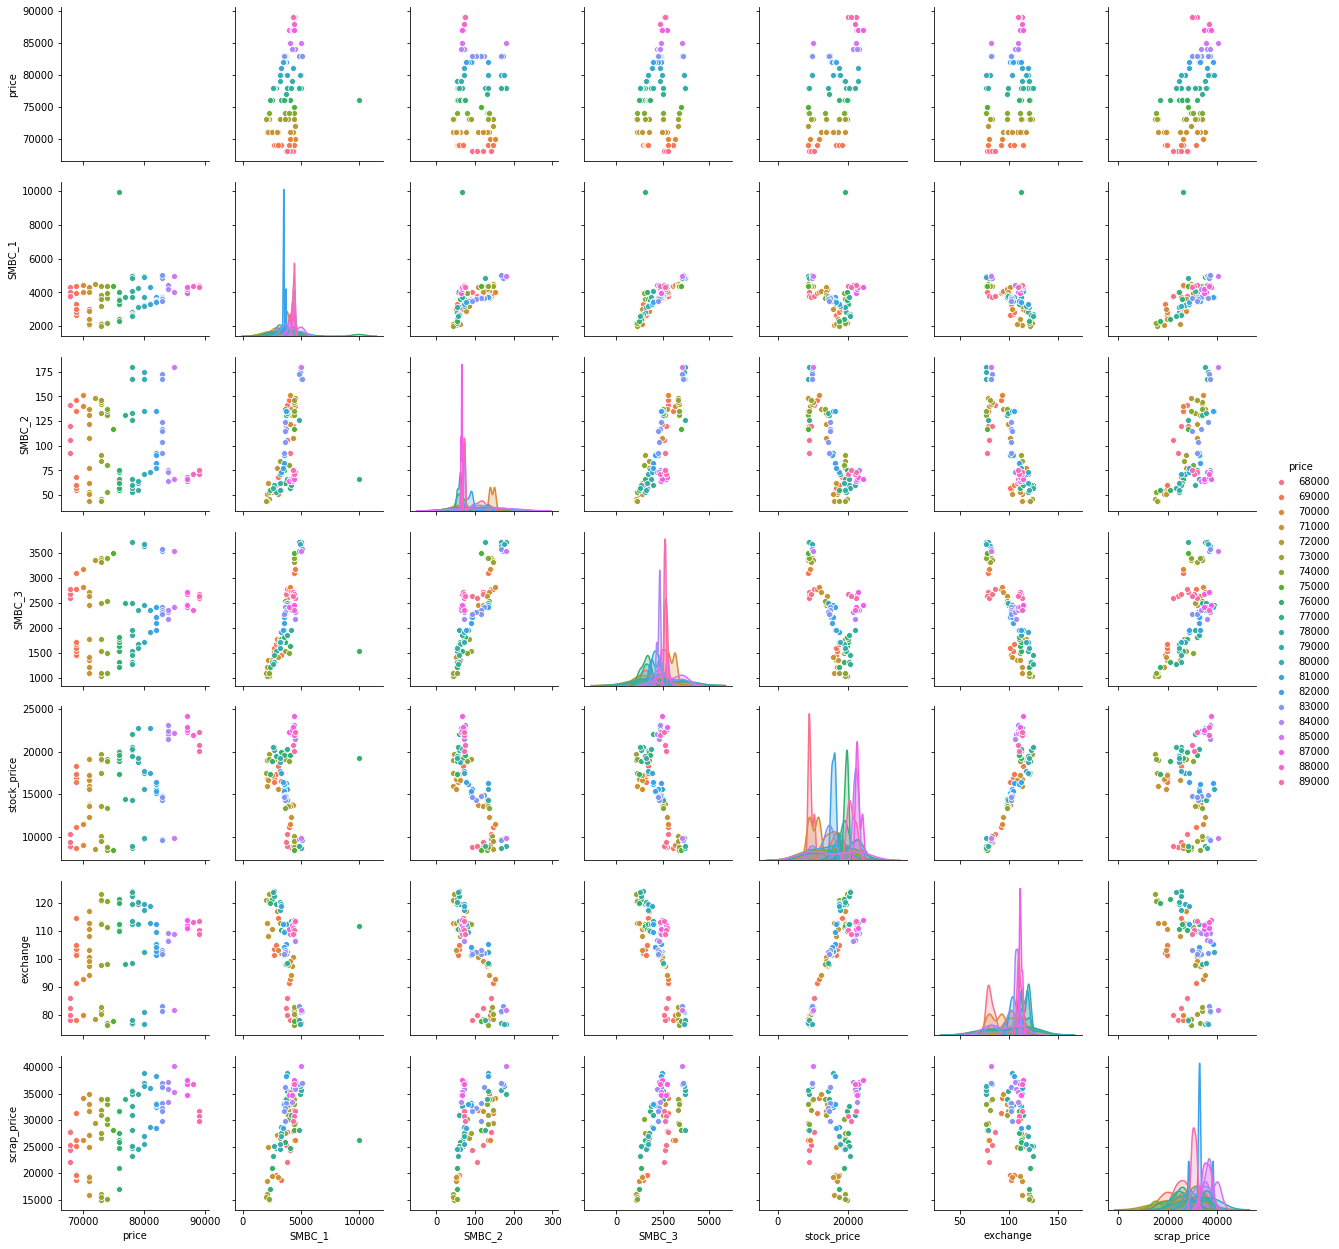

In [7]:
#各変数間の関係性の図
import seaborn as sns

sns.pairplot(iron_df,hue="price").savefig('/content/drive/My Drive/iron_price_ai/figure.png')